# analyse data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('log/CartPole-v1_log.csv', delimiter=';')
data['rewards'] = data['rewards'].map(lambda x : np.array(list(map(float, x.split(',')))))
data

,env,llm,reward_function,rewards,mean_reward,std_reward,SR
0,CartPole-v1,qwen2.5-coder,NaN,"[0.018658300943617055, 0.009568359458265155, 0...",0.025560,0.034819,0.72
1,CartPole-v1,qwen2.5-coder,"def reward_func(observations: np.ndarray, term...","[0.01898253486606978, 0.009466711703891333, 0....",0.027088,0.034487,0.12
2,CartPole-v1,qwen2.5-coder,"def reward_func(observations: np.ndarray, term...","[0.018636384019435813, 0.009266815022439237, 0...",0.026193,0.034295,0.79
3,CartPole-v1,qwen2.5-coder,"def reward_function(observations, terminated, ...","[0.022578281694186388, 0.01157860599701866, 0....",0.023368,0.029741,0.20
4,CartPole-v1,qwen2.5-coder,NaN,"[0.009609404089217996, 0.009609404089217996, 0...",0.025987,0.036728,0.92
...,...,...,...,...,...,...,...
86,CartPole-v1,qwen2.5-coder,"def reward_func(observations: np.ndarray, is_s...","[0.007394216252396587, 0.015351045052204, 0.02...",0.028523,0.030029,0.70
87,CartPole-v1,qwen2.5-coder,"def reward_func(observations: np.ndarray, is_s...","[0.007394216252396587, 0.015351045052204, 0.02...",0.028523,0.030029,0.70
88,CartPole-v1,qwen2.5-coder,NaN,"[0.008023308893977748, 0.011798983667614336, 0...",0.027687,0.036347,0.50
89,CartPole-v1,qwen2.5-coder,import numpy as np\n\ndef reward_func(observat...,"[0.009120705428689908, 0.011900039262569124, 0...",0.026521,0.036800,0.90


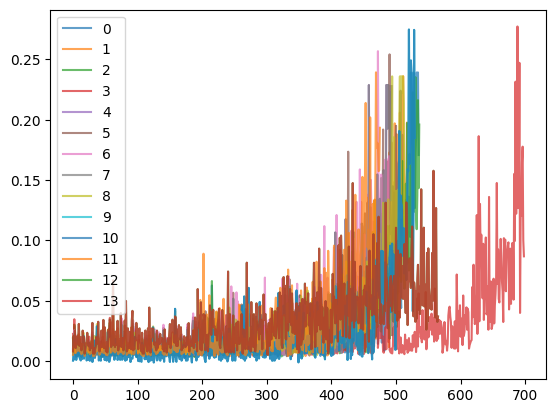

In [3]:
for idx, rew in enumerate(data['rewards']):
	plt.plot(rew, label=idx, alpha=0.7)
	plt.legend()